# Clustering
## Name: Nguyen Anh Hoang Phuc

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
class ScratchKMeans():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def _remyu(self, X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1], axis=0)
    
    def _reclustering(self, X):
        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))

                if dist < dist_m:
                    dist_m = dist 
                    X[i,-1] = j

    def _sse(self, X):
        self.best_sse = 10**10

        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1] - self.myu[j])**2)

        if self.best_sse > sse:
            self.best_sse = sse 
            self.record_myu = self.myu 
            self.record_cluster = self.n_clusters

    def _silhouette(self,X):
        return

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for k in range(self.n_init):

            # Initial setting of the center point myu_k for the number of clusters
            self.myu = X[np.random.choice(len(X), size=self.n_clusters,replace=False)]

            # Set the clustered value
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X, cluster.reshape(-1,1)], axis=1) 
            
            for ite in range(self.max_iter):
                self._reclustering(X_cluster)

                old_myu = self.myu
                self._remyu(X_cluster)

                # Outputs the learning process when verbose is set to true
                if self.verbose:
                    fig = plt.subplots(figsize=(10,8))
                    plt.rcParams["font.size"] = 20

                    for i in range(self.n_clusters):
                        plt.scatter(X[X_cluster[:,-1]==i,0],X[X_cluster[:,-1]==i,1],s=80)
                    plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                    plt.show()
                
                # Iteration continuation judgment
                if np.sum(old_myu - self.myu) < self.tol:
                    self._sse(X_cluster)
                    break
                self._sse(X_cluster)
        
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))

        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))

                if dist < dist_m:
                    dist_m = dist 
                    y_pred[i] = j
        return y_pred

In [3]:
class ScratchKMeans_speed():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def _remyu(self, X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[self.cluster==j], axis=0)
    
    def _reclustering(self, X):
        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T

        self.cluster = np.argmin(self.dist, axis=1)

    def _sse(self, X):
        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T
        self.best_sse = 10**10
        sse = np.sum(np.min(self.dist, axis=1)**2)

        self.best_sse = 10**10
        if self.best_sse > sse:
            self.best_sse = sse 
            self.record_myu = self.myu 
            self.record_cluster = self.n_clusters
            self._silhouette(X) if self.n_clusters >= 2 else _

    def _silhouette(self,X):
        ab = np.zeros([len(X), 2])

        self.silhouette_vals = np.zeros(len(X))

        for i,j in enumerate(X):
            ab[i,0] = np.sum(np.linalg.norm(j-X[self.cluster == self.cluster[i]], ord=2, axis=1))/len(X[self.cluster == self.cluster[i]]-1)
            ab[i,1] = np.mean(np.linalg.norm(j-X[self.cluster == self.dist[i].argsort()[1]],ord=2,axis=1))

            self.silhouette_vals[i] = (ab[i,1] - ab[i,0])/np.max(ab[i])
        
        self.silhouette_avg = np.mean(self.silhouette_vals)
        self.y_km = self.cluster
        self.cluster_labels = np.unique(self.cluster)

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for k in range(self.n_init):

            # Initial setting of the center point myu_k for the number of clusters
            self.myu = X[np.random.choice(len(X), size=self.n_clusters,replace=False)]
            
            for ite in range(self.max_iter):
                self._reclustering(X)

                old_myu = self.myu
                self._remyu(X)

                # Outputs the learning process when verbose is set to true
                if self.verbose:
                    fig = plt.subplots(figsize=(10,8))
                    plt.rcParams["font.size"] = 20

                    for i in range(self.n_clusters):
                        plt.scatter(X[self.cluster==i,0],X[self.cluster==i,1],s=80)
                    plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                    plt.show()
                
                # Iteration continuation judgment
                if np.sum(old_myu - self.myu) < self.tol:
                    self._sse(X)
                    break
                self._sse(X)
        
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        diff = (X-self.record_myu[:,None]).reshape(-1,2)
        dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.record_cluster,-1).T

        return np.argmin(dist, axis=1)

## Artificial dataset for clustering

We have the code to create an artificial dataset for experimenting with clustering.

This make_blobs function also outputs the correct label, but this time we will not use it. Received with_ (underscore) to indicate that it will not be used.

《Simple data set 3》

In [4]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [5]:
X.shape

(100, 2)

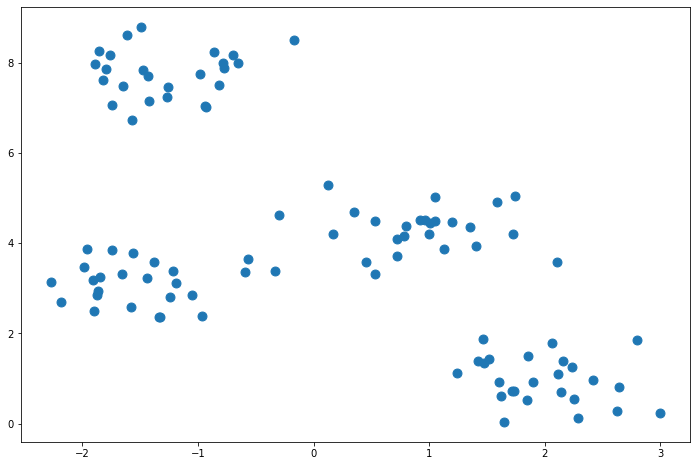

In [6]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80)

## Problem 1 Determine the initial value of the center point

From the entered data $K$ center point of $\mu_{1}$ from $\mu_{K}$ create a code that determines the initial value of. $K$ is the specified number of clusters.

The simplest way to determine the initial value is to use data points $X​_n$ randomly select from $K$. The first step is to choose one. This is what you should implement this time.

K-means learning result is the center point. It is affected by the initial value of $\mu$. Therefore, at the time of learning, calculation is performed with multiple initial values.

In [7]:
# Select k randomly
k = 2
myu = X[np.random.choice(len(X),size=k,replace=False)]
print(myu.shape)
print(myu)

(2, 2)
[[2.15940501 1.38598318]
 [2.25643834 0.55525861]]


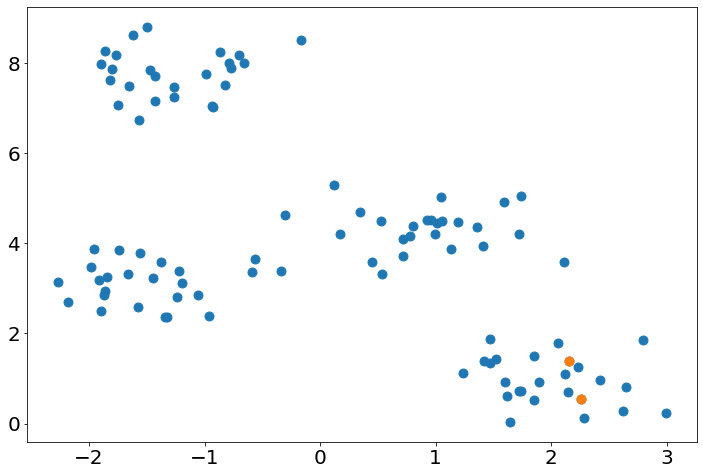

In [8]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80)

# Problem 2 Creation of a function to obtain SSE

Create a function that calculates the sum of squared errors (SSE).

K-means minimizes this SSE $r_{n k}$ when $\mu_{k}$ the purpose is to ask. From the clustering result calculated with multiple initial values, use the function that finds this SSE when deciding which is finally adopted.

$S S E=\sum_{n=1}^{N} \sum_{k=1}^{K} r_{n k}\left\|X_{n}-\mu_{k}\right\|^{2}$

Silhouette factor $n$: Index of data points

There is also a silhouette figure to help you decide $k$: Cluster index

$X​_​n$: $n$ th data point

$\mu_{​k}$: $k$ th center point

$r_{n k}$: Data points $X_{n}$ is a cluster $k1$ if you belong to, 0 otherwise

In [9]:
num = 10

In [10]:
# Add a label for verification
label = np.random.randint(0,k,len(X[0:num]))
X_test = np.concatenate([X[0:num],label.reshape(-1,1)],axis=1)
print(X_test.shape)
print(X_test)

(10, 3)
[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  1.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  0.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  1.        ]
 [-0.77354537  7.87923564  0.        ]
 [ 0.12313498  5.27917503  1.        ]
 [-1.43284669  7.71577043  0.        ]]


In [11]:
# Calculating Euclidean Distance
np.sqrt(np.sum((X[0]-myu[0])**2))

2.7361635180284543

In [12]:
# Calculated in L2 norm
np.linalg.norm(X[0]-myu[0],ord=2)

2.7361635180284547

In [13]:
# SSE small test
for i in range(5):
    for j in range(len(myu)):
        if j == X_test[i,2]:
            sse = np.sqrt(np.sum((X_test[i,0:2]-myu[j])**2))
    print(sse)

2.7361635180284543
7.731206793345959
3.9141589201216873
3.297760403131117
3.5645380439239847


In [14]:
# Calculate in L2 norm
for i in range(5):
    for j in range(len(myu)):
        if j == X_test[i,2]:
            sse = np.linalg.norm(X_test[i,0:2]-myu[j])
    print(sse)

2.7361635180284547
7.731206793345959
3.9141589201216873
3.297760403131117
3.5645380439239847


## Repeat cluster allocation and center point movement

The basis of learning K-means is to repeat the following two phases.

- Center point $\mu_{k}$ after fixing $S​​S​E$, choose cluster allocation to minimize $r_{n k}$
- Cluster assignment $r_{n k}$ after fixing $S​S​E$, center point that minimizes $\mu_{k}$

First center point  $\mu_{k}$ is the initial value created in question 1.

I will look at them in order.

## Problem 3 Allocation to cluster

Create a code to assign to the closest center point  $\mu_{k}$


In K-means nearmeans that the Euclidean distance between points becomes smaller. The Euclidean distance is obtained by the Pythagoras theorem (Squares theorem), but it is a vector p​ ​,​ ​q

can be expressed by the following formula.

$\|q-p\|=\sqrt{(q-p) \cdot(q-p)}$

Use this function as it is provided as np.linalg.norm​

numpy.linalg.norm — NumPy v1.17 Manual

Center point $\mu_{k}$; although you have fixed SSE and minimized $SSE$, you do not need to calculate SSE itself.

In [15]:
# Re-clustering small test
for i in range(5):
    dist_m = 10**10
    for j in range(len(myu)):
        dist = np.sqrt(np.sum((X_test[i,:-1]-myu[j])**2))
        print(dist)
        if dist < dist_m:
            dist_m = dist
            X_test[:,-1] = j
    print("New labels: ", X_test[i:2])


2.7361635180284543
3.5117352889733917
New labels:  [[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]]
7.731206793345959
8.496773752505767
New labels:  [[-1.89468423  7.96898545  0.        ]]
3.084882279547265
3.9141589201216873
New labels:  []
3.297760403131117
4.117189147932972
New labels:  []
3.5645380439239847
4.4002622322507
New labels:  []


In [16]:
# Re-clustering small test
dist_nd = np.zeros([len(X),k])
print(dist_nd.shape)

for i in range(len(X)):
    for j in range(k):
        dist_nd[i,j] = np.linalg.norm(X[i]-myu[j])
print(dist_nd[0:5])

(100, 2)
[[2.73616352 3.51173529]
 [7.73120679 8.49677375]
 [3.08488228 3.91415892]
 [3.2977604  4.11718915]
 [3.56453804 4.40026223]]


In [17]:
# Difference of ndarray - Checking
show = False
if show:
    for i in range(len(X)):
        for j in range(k):
            print(X[i]-myu[j])

In [18]:
# Can't we do it without the for??
norm = (X-myu[:,None]).reshape(-1,2)
# tmp = norm.reshape(-1,2)

# reshape(n_clusters,-1).T 
cal = np.linalg.norm(norm,ord=2,axis=1).reshape(2,-1).T 
cal[0:5]

array([[2.73616352, 3.51173529],
       [7.73120679, 8.49677375],
       [3.08488228, 3.91415892],
       [3.2977604 , 4.11718915],
       [3.56453804, 4.40026223]])

In [19]:
c1 = np.argmin(cal, axis=1)
c1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Problem 4 Moving the center point
Create a code to move the center point $\mu_{k}$ to the average (center of gravity) of all data points $X_n$ assigned to the $k_th$ cluster (center of gravity)

You are minimizing the SSE by fixing the cluster assignment mk.
There is no need to find the SSE itself.

In [20]:
# Move the center point myu_k Test small
np.mean(X_test[X_test[:,2]==0,:-1],axis=0)

array([-0.04300358,  5.43446591])

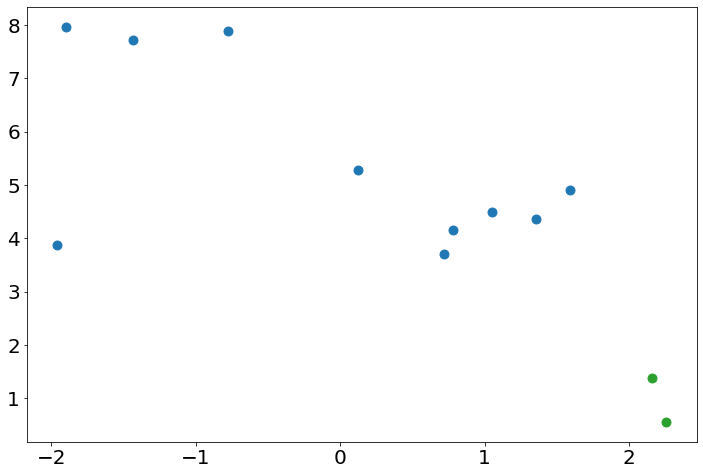

In [21]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X_test[X_test[:,2]==0,0],X_test[X_test[:,2]==0,1],s=80)
plt.scatter(X_test[X_test[:,2]==1,0],X_test[X_test[:,2]==1,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80)

## Problem 5 Repeat

Write code that learns by repeatedly assigning to the cluster and moving the center point.

Stop this if any of the following conditions are met:

- The repeat reaches the specified number of times. (Argument max_iter in the template)
- Center point $\mu_{k}$; and the difference between the center of gravity is less than or equal to the specified tolerance. (Argument tol in template)

Implement questions 1 to 4 in a class function and repeat


In [22]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split
X_train, X_valid = train_test_split(X, train_size=0.8,random_state=None)

print(X_train.shape)
print(X_valid.shape)

(80, 2)
(20, 2)


## Problem 6 Calculate with different initial values

Create code that calculates the repetition of question 5 by changing the initial value a specified number of times. The number of times is specified by the argument n_init in the template.

Since the final learning result is the one with the smallest SSE among multiple calculations, the center point at that time $\mu_{k}$ I will keep it.

In [23]:
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)
clf.fit(X_train)

## Problem 7 Estimate

When estimating which cluster to belong to for new data, do the same as in the first phase of training.

- Assign the data points $X_n$; and the central point decided by learning μ​ ​kagainst $​S​SE$​ ​Eminimizes $r_{n k}$

Specifically, it is as follows.

- Assign the data points $X_{n}$ to the closest $\mu_{k}$.

In [24]:
# Scratch clustering to estimate validation data
pred = clf.predict(X_valid)
print(pred)

[3. 0. 0. 3. 0. 3. 1. 3. 3. 3. 3. 1. 0. 1. 3. 3. 3. 2. 2. 1.]


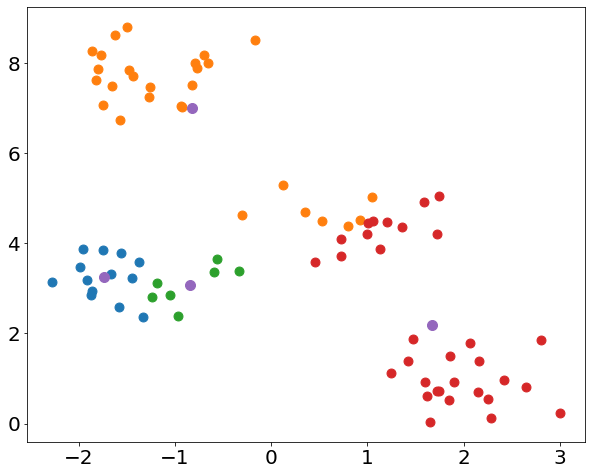

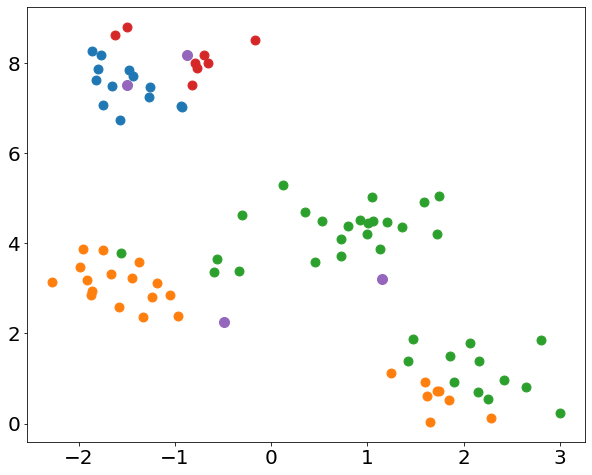

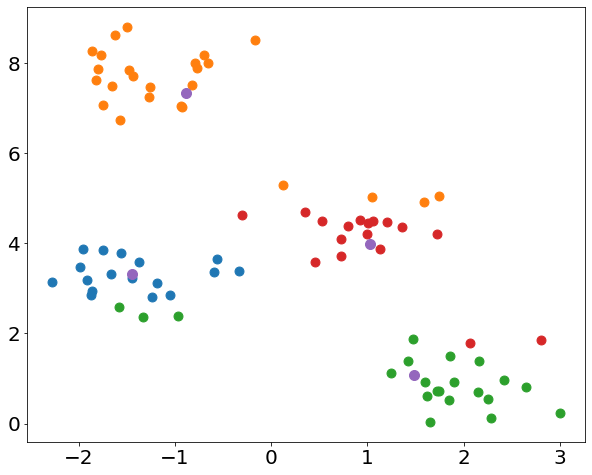

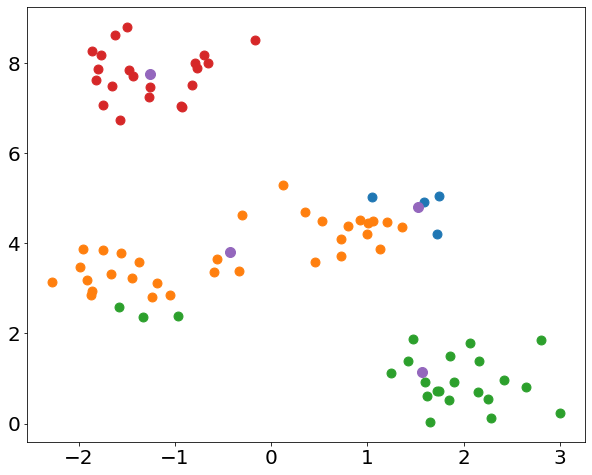

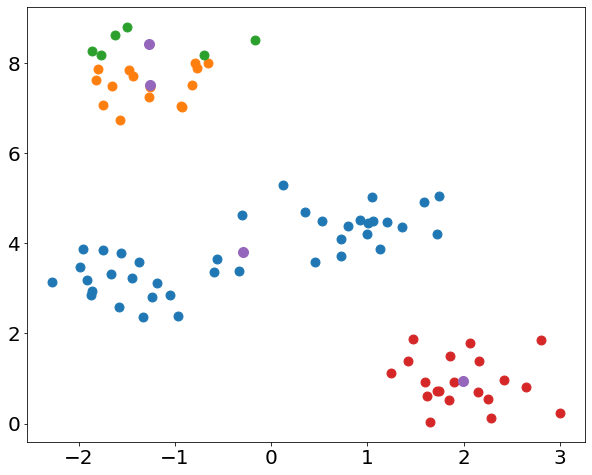

In [25]:
clf2 = ScratchKMeans_speed(n_clusters=4, n_init=5, max_iter=1000, tol=1e-5, verbose=True)
clf2.fit(X_train)

In [26]:
# Extimate validation data with Scratch Clustering2
pred = clf2.predict(X_valid)
print(pred)

[0 0 0 3 0 0 1 0 3 3 3 2 0 2 0 3 0 0 0 1]


In [27]:
%%timeit
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

The slowest run took 14.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 341 ns per loop


In [28]:
%%timeit
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

The slowest run took 24.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 333 ns per loop


# Problem 8 Implementation of elbow method

Number of center points in K-means $k$ needs to be decided artificially, but there is the Elbow method as the judgment method. Number of center points by elbow method $k$ please write code to consider.

Display a line graph with the horizontal axisnumber of clusters $k$ and SSE is vertical axis. For this purpose, please make SSE available from the K-means instance.

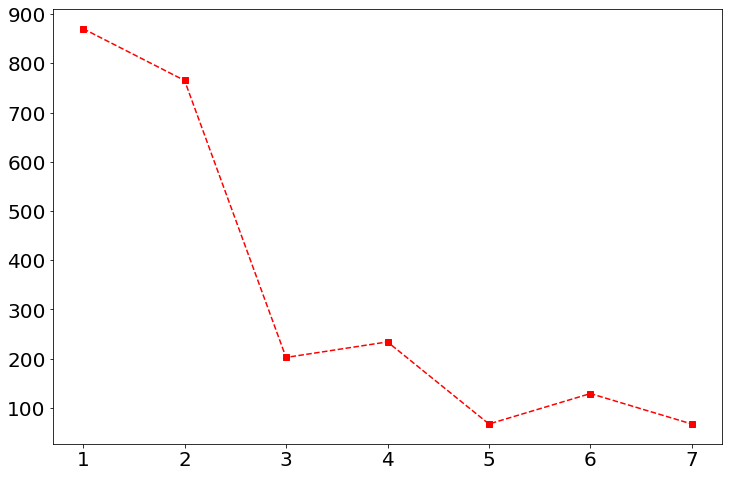

In [29]:
# Model evaluation with elbow method
elbow = {}
for k in range(1,8):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()), 'rs--')

## Problem 9 (Advance assignment) Silhouette diagram

There is also a silhouette figure to help you decide $k$. Create the code to display the silhouette figure.

We have prepared the code to display the diagram using Matplotlib. Please give:

silhouette_vals: ndarray of shape (n_samples,), silhouette coefficient of each data point

silhouette_avg: float, average value of silhouette coefficient

y_km shape (n_samples,), cluster label name of each data point

cluster_labels: list, a list of cluster label names

n_clusters: int, number of clusters

Silhouette factor $n$ for the th data point $s_{n}$ can be calculated by the following formula. Please implement this formula and check the silhouette figure.

$s_{n}=\frac{b_{n}-a_{n}}{\max \left(b_{n}, a_{n}\right)}$

$a_{n}$: Cohesion degree. The average distance to other data points in the same cluster.

$b_{n}$: Degree of divergence. Average distance to all data points in the closest other cluster.


In [30]:
# Sort, get index
print(myu)
print(myu[1].argsort()[1])

[[2.15940501 1.38598318]
 [2.25643834 0.55525861]]
0


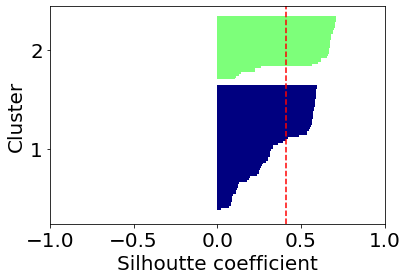

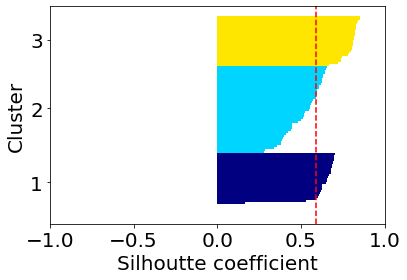

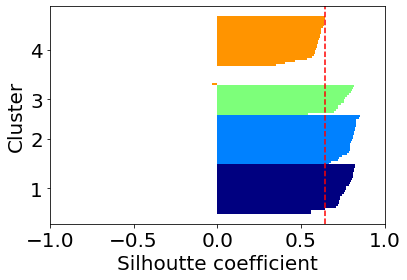

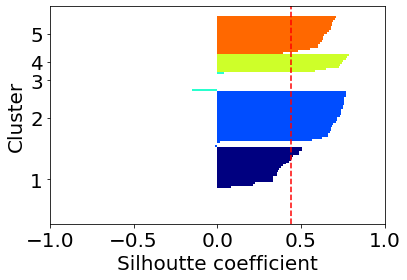

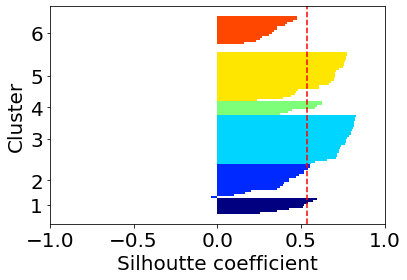

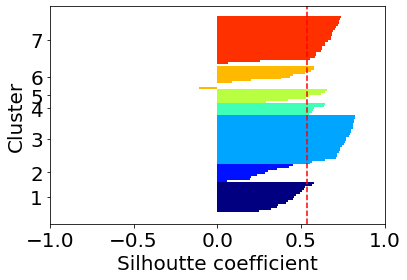

In [31]:
# Visualize a silhoutte diagram
from matplotlib import cm

plt.rcParams["font.size"] = 20

for k in range(2,8):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(X)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhoutte_vals = model.silhouette_vals[model.y_km == c]
        c_silhoutte_vals.sort()
        y_ax_upper += len(c_silhoutte_vals)
        color = cm.jet(i/model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhoutte_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhoutte_vals)
    
    plt.axvline(model.silhouette_avg, color='red', linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel("Cluster")
    plt.xlabel("Silhoutte coefficient")
    plt.xlim(-1,1)
    plt.show()

## Cluster analysis

## Wholesaler data analysis

Use the Wholesale customers Data Set to learn how to use clustering.

UCI Machine Learning Repository: Wholesale customers Data Set

Download Wholesale customers data.csv from the Data Folder. This is data collected from customers by a wholesaler in Lisbon, Portugal. The contents are data on how many euros each customer buys milk and groceries each year. Customers are retail stores and restaurants. Region and Channel are peeped and K-means is used for monetary data.

## Dimensionality reduction

There are 6 features related to the amount of money, but we will reduce the dimensions for visualization. For this, we have prepared a sample code of PCA by scikit-learn, so please use it.


In [32]:
# Cluster Analysis Library Import
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

In [33]:
warnings.simplefilter('ignore')

In [34]:
data = pd.DataFrame(pd.read_csv('./Wholesale_customers_Data_Set/Wholesale customers data.csv'))

In [35]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [37]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


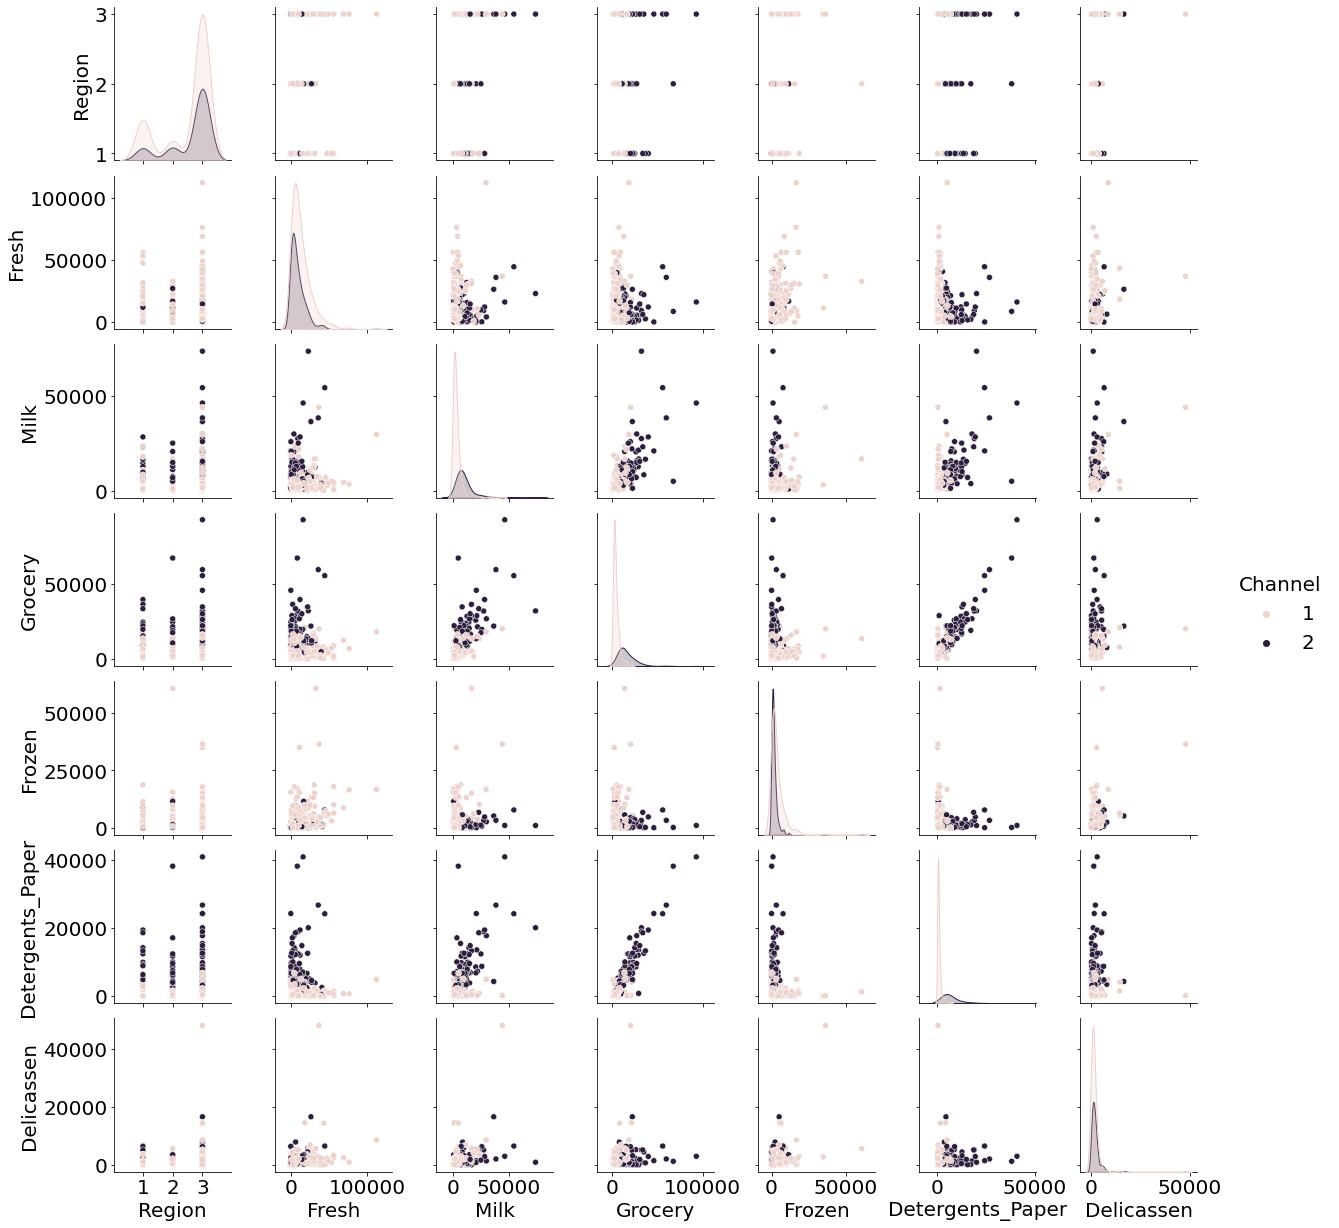

In [38]:
sns.pairplot(data,hue="Channel")

In [39]:
data.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [40]:
data.groupby(['Region']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [41]:
data.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


## Problem 10 Selection of the number of clusters k

Optimal number of clusters k
please choose. In addition to using the elbow method and silhouette figures, how humans want to use it later will also be involved in the selection. Make a selection and explain why you chose it.

In [42]:
# Delete Channel and Region
data_c = data.iloc[:,2:7]
data_c

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,12669,9656,7561,214,2674
1,7057,9810,9568,1762,3293
2,6353,8808,7684,2405,3516
3,13265,1196,4221,6404,507
4,22615,5410,7198,3915,1777
...,...,...,...,...,...
435,29703,12051,16027,13135,182
436,39228,1431,764,4510,93
437,14531,15488,30243,437,14841
438,10290,1981,2232,1038,168


In [43]:
# Logarithmic transformation
data_log = data_c.apply(np.log1p)

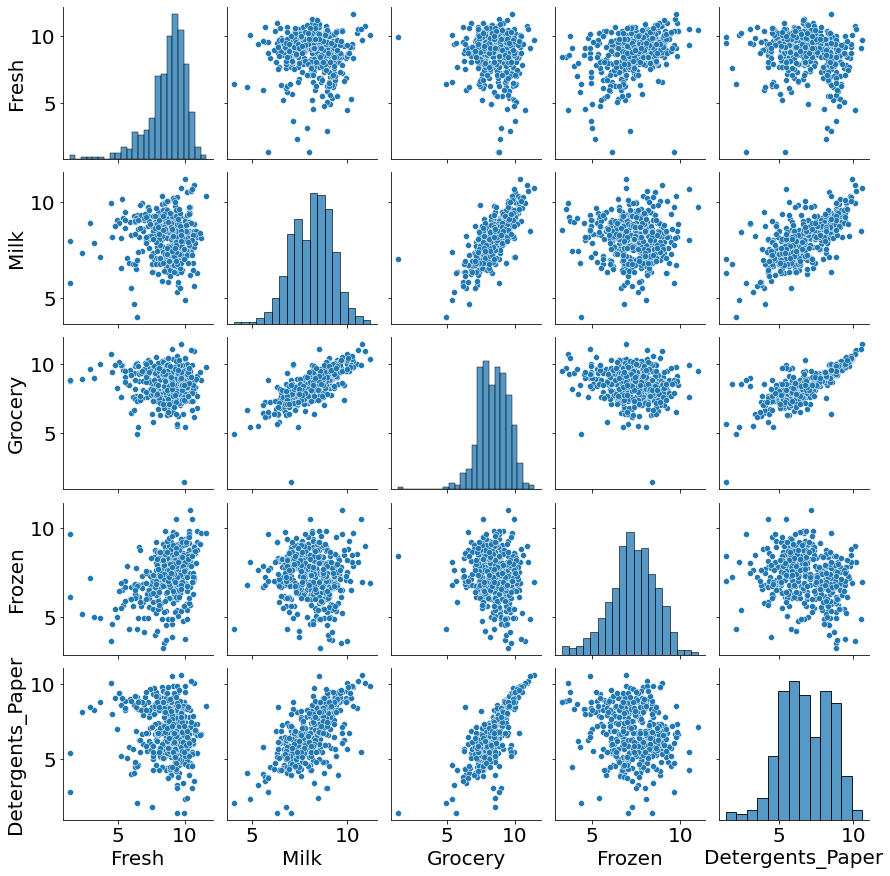

In [44]:
# pairplot
sns.pairplot(data_log)

[0.45961362 0.86478588 0.93481596 0.97883941]


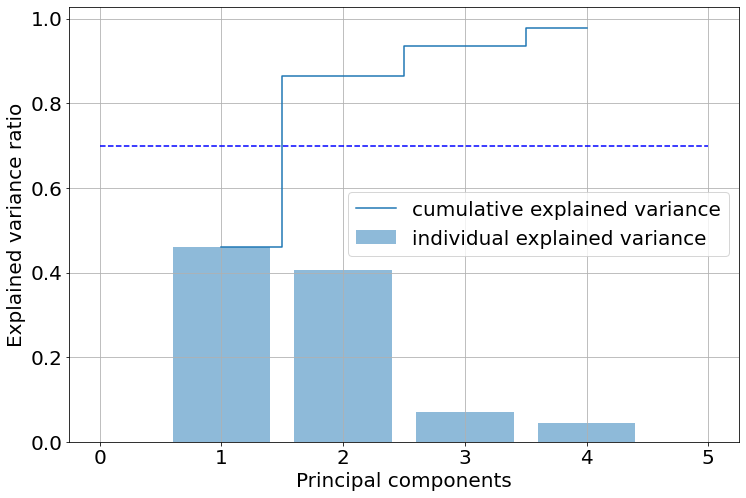

In [45]:
# dispersion explanation rate
n = 4

pca = PCA(n_components=n)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

fig = plt.subplots(figsize=(12,8))
plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, n+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

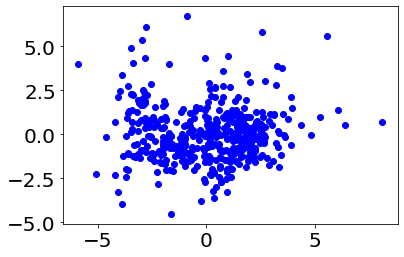

In [46]:
# PCA analysis (diamension reduction for visualization)
pca = PCA(n_components=2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)
plt.plot(data_pca[:,0], data_pca[:,1],'bo')

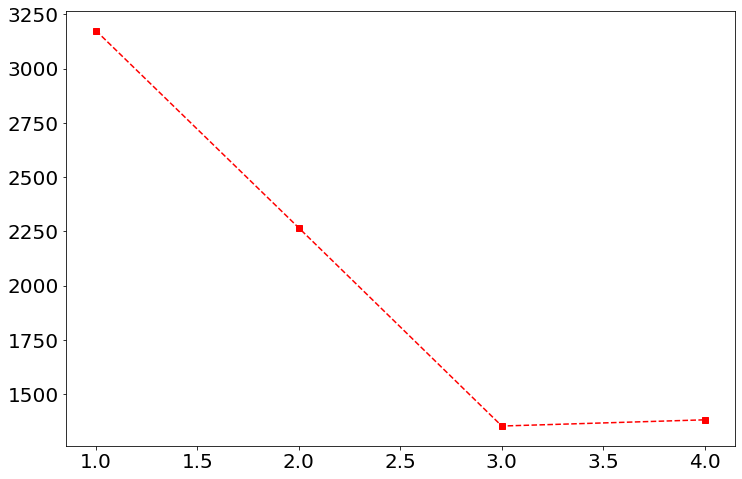

In [47]:
# Model evaluation with elbow method
elbow = {}
for k in range(1,5):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(data_pca)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()), 'rs--')

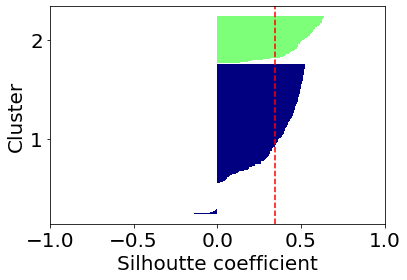

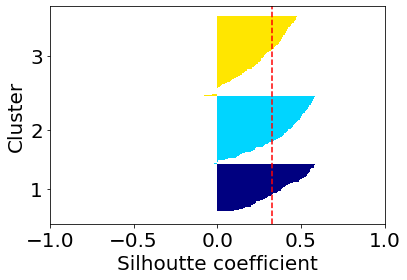

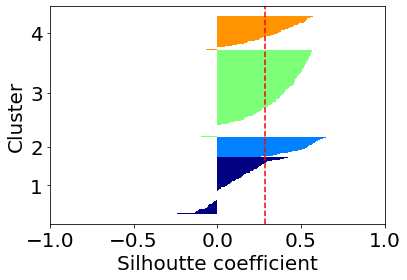

In [48]:
# Visualize a silhoutte diagram
from matplotlib import cm

plt.rcParams["font.size"] = 20

for k in range(2,5):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(data_pca)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhoutte_vals = model.silhouette_vals[model.y_km == c]
        c_silhoutte_vals.sort()
        y_ax_upper += len(c_silhoutte_vals)
        color = cm.jet(i/model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhoutte_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhoutte_vals)
    
    plt.axvline(model.silhouette_avg, color='red', linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel("Cluster")
    plt.xlabel("Silhoutte coefficient")
    plt.xlim(-1,1)
    plt.show()

Choosing the number of cluster k
Based on the followning, the number of clustersk should be 3 (2 is also valid)
- Elbow method... 3 looks good
- Silhouette diagram... 3 looks good
- It would be beneficial to the wholesaler if the purchasing side could be divided into the following classification groups:"large quantity, large variety", "large quantity, small variety", and "small quantity (large variety, small variety)"

In [49]:
# k=3 clustering
model = ScratchKMeans_speed(n_clusters=3,n_init=100,max_iter=1000,tol=1e-5)
model.fit(data_pca)

In [50]:
# Label values after clustering
cluster = model.y_km 

# Join to data
data['Cluster'] = cluster 

In [51]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


In [52]:
data_pca_label_ = np.concatenate([data_pca,cluster.reshape(-1,1)],axis=1)
data_pca_label_

array([[-1.6933576 , -0.05905416,  2.        ],
       [-1.65123599, -0.76059128,  2.        ],
       [-1.51792715, -0.79642891,  2.        ],
       ...,
       [-3.60228374, -1.14311892,  2.        ],
       [ 1.8106657 ,  0.30024815,  1.        ],
       [ 0.18304615,  2.59817873,  1.        ]])

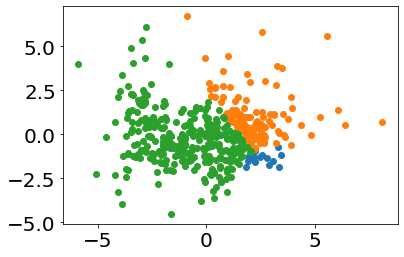

In [53]:
# Visualization
for i in range(model.n_clusters):
    plt.scatter(data_pca_label_[cluster==i,0],data_pca_label_[cluster==i,1])

## Problem 11 Comparison with known groups

Region and Channel were not used for K-means, but they are known groups. Find out and explain how the cluster differs from these known groups. First, visualize each one.

Text(0.5, 1.0, 'Channel')

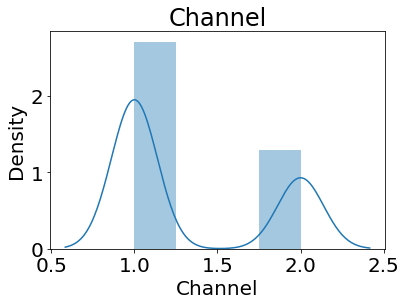

In [54]:
feature = 'Channel'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title(feature)

Text(0.5, 1.0, 'Region')

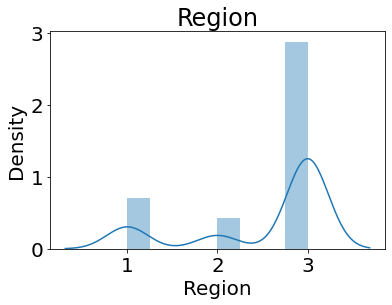

In [55]:
feature = 'Region'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title(feature)

Text(0.5, 1.0, 'Cluster')

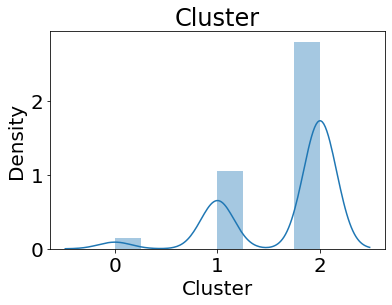

In [56]:
feature = 'Cluster'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title(feature)

Comparison with known group
- Channel, Region...Clearly distinguishable. Restaurants and retail, Lisbon and Porto, etc.
- Cluster: Cannot be clearly separated. Grouped by similarity between data.

## Problem 12 Useful information for wholesalers

Find information that is useful to the wholesaler and put it together in a sentence.

《Hint》

Let's use the data before preprocessing and see the summary statistics of each cluster. Also, I used K-means for the data that was dimensionally reduced by PCA, but please try using 6 features as they are or using only some features. Please also refer to the comparison result with the known group.

​groupby is useful when viewing data by condition.

pandas.DataFrame.groupby — pandas 0.23.4 documentation

In [57]:
data.groupby(['Channel', 'Region', 'Cluster']).agg(['mean','max','min'])

Fresh                         Milk         \
                                mean     max    min          mean    max   
Channel Region Cluster                                                     
1       1      0        31614.000000   31614  31614    489.000000    489   
               1         8064.450000   18692    514   1718.200000   8323   
               2        14956.052632   56083    964   5091.815789  23527   
        2      0        16933.000000   16933  16933   2209.000000   2209   
               1         6736.600000   22321      3   1546.400000   3696   
               2        14230.352941   32717   1182   2755.647059  16784   
        3      0        24955.538462   56159   9061   3049.384615   7152   
               1         8987.918605   42786      3   1602.883721   7330   
               2        16347.196429  112151      9   4984.491071  43950   
2       1      2         5200.000000   20782     18  10784.000000  28326   
        2      0        16823.000000   16823  16823    928.000000    928   
               2         6760.166667   27082    161   9649.833333  25071   
        3      2         9831.504762   44466     23  10981.009524  73498   

                                   Grocery                     Frozen         \
                         min          mean    max   min          mean    max   
Channel Region Cluster                                                         
1       1      0         489   1495.000000   1495  1495   3242.000000   3242   
               1         258   1884.400000   6869   489   2451.350000   7496   
               2         577   5219.973684  16966   572   3480.078947  18711   
        2      0        2209   3389.000000   3389  3389   7849.000000   7849   
               1         333   2484.600000   7021  1330   3069.100000  15601   
               2         713   5578.764706  13626  2405   7195.352941  60869   
        3      0         555   2257.615385   8253   683  11477.538462  35009   
               1          55   1932.802326   6252     3   1929.395349   9735   
               2         640   5576.169643  21042  1242   4075.625000  36534   
2       1      2        2527  18471.944444  39694  5265   2584.111111   8321   
        2      0         928   2743.000000   2743  2743  11559.000000  11559   
               2        1897  17080.944444  67298  5234    984.000000   1840   
        3      2        1124  15953.809524  92780  4523   1513.200000   8132   

                              Detergents_Paper                Delicassen  \
                          min             mean    max   min         mean   
Channel Region Cluster                                                     
1       1      0         3242       111.000000    111   111   615.000000   
               1          469       189.450000    954     5   760.150000   
               2           91      1373.184211   5828   205  1442.473684   
        2      0         7849       210.000000    210   210  1534.000000   
               1          264       190.200000    387    15   839.100000   
               2          909       670.823529   1679   140  1237.647059   
        3      0         2995       197.692308    621    20  1349.384615   
               1           47       207.313953    949     3   760.872093   
               2           25      1299.919643   6907    51  2119.473214   
2       1      2           61      8225.277778  19410   788  1871.944444   
        2      0        11559       332.000000    332   332  3486.000000   
               2          131      8859.055556  38102  2208  1114.166667   
        3      2           33      6899.238095  40827   523  1826.209524   

                                     
                          max   min  
Channel Region Cluster               
1       1      0          615   615  
               1         2100    18  
               2         6854     7  
        2      0         1534  1534  
               1         2602   259  
            

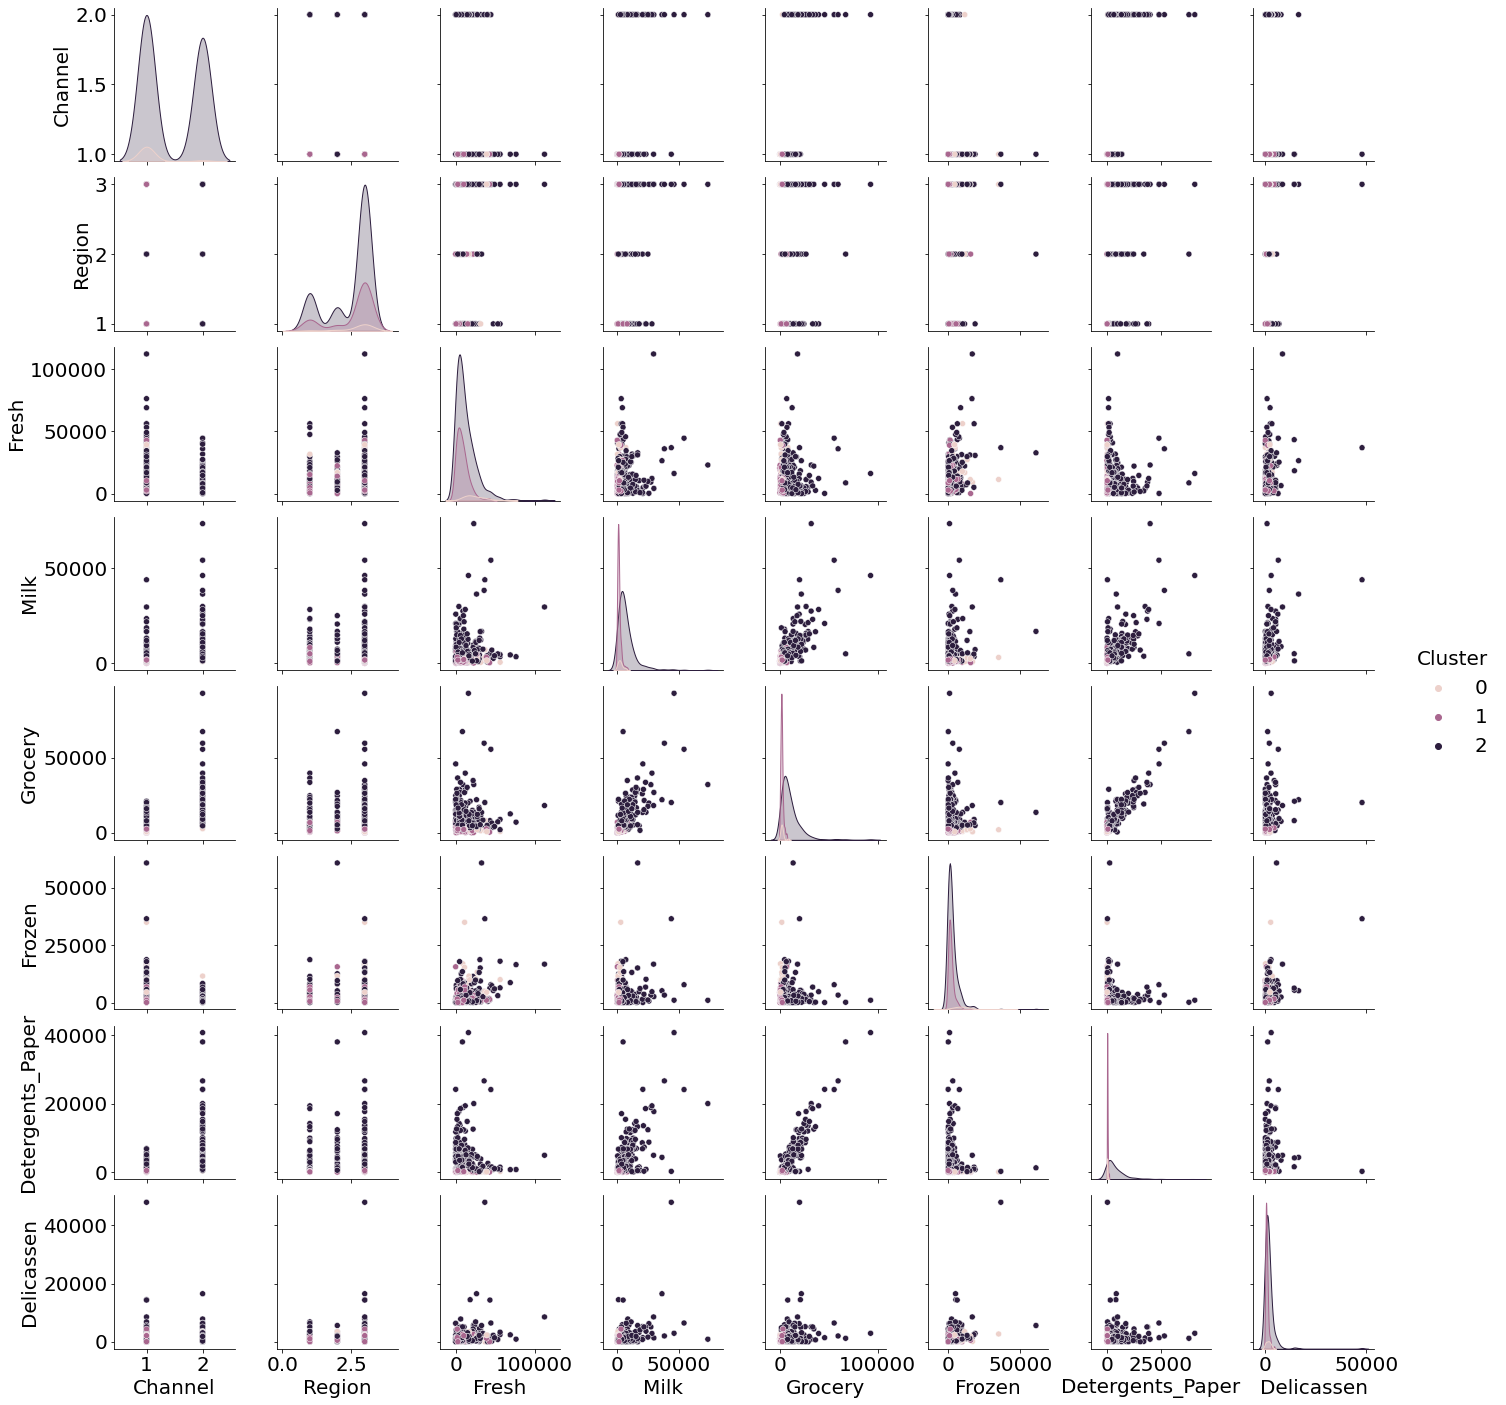

In [58]:
# pairplot
sns.pairplot(data,hue="Cluster")

- What we knew... By distinguishing between industries, we were able to identify the industries that buy the most dairy products (restaurantss, cafes?) and the industries that buy the most groceries and detergents (retail). (restaurants, cafes?) and those that buy a lot of groceries and detergents (retail).
- What we found out... By clustering the purchase data, we may be able to separate the groups that purchase a lot (large sales) and those that do not 
- Advantages...It will help to stabilize supply and reduce waste because it will make it clearer who can be expected to make sales. I think.

## Problem 13 (Advance assignment) Investigation of other methods

In addition to K-means dealt with this time, DBSCAN is a well-known method for non-hierarchical clustering.
​Other than PCA, t-SNE and LLE are well-known methods for dimensionality reduction.

- Advantages and disadvantages of DBSCAN

Feature...Denity-based clustering
- Merit 1... Can separate noise (can difficult data be classified well with K-means?)
- Merit 2... No need to specify the number of clusters
- Advantage 2: No need to specify the number of clusters * Disadvantage 1: High computational cost (the higher the dimensionality, the harder it is...)

- Advantages and disadvantages of t-SNE and LLE

Feature: Nonlinear dimensional compression
- Merit 1: Captures local structures in high dimensions well
- Merit 2: Captures global structures as well as possible
- Disadvantage: Changing internal parameters can result in the appearance of completely different clusters. 

## Problem 14 (Advance assignment) Use of t-SNE and DBSCAN

​Use t-SNE instead of PCA to reduce the dimensions of Wholesale customers' data. Furthermore, cluster using DBSCAN instead of K-means.

Let's compare the clustering result with the result of PCA + kmeans. Please use scikit-learn for implementation.

sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation

sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation

《Parameter tuning》

These are methods that are more difficult to tune parameters than K-means and PCA. It is also important to confirm the meaning of the parameters while referring to the paper as well as the scikit-learn document.

t-SNE treatise

DBSCAN treatise

In [59]:
from sklearn.manifold import TSNE 
from sklearn.cluster import DBSCAN 

In [60]:
data_embedded = TSNE(n_components=2).fit_transform(data_log)

In [61]:
clusteringDBSCAN = DBSCAN(eps=2, min_samples=2).fit(data_embedded)
clusteringDBSCAN.labels_

array([ 0,  0,  0,  1,  2,  0,  0,  0,  0,  3,  0,  1,  0,  3,  0,  4,  0,
        5,  0,  0,  0,  1,  2,  3,  3,  0,  1,  1,  3,  6,  0,  5,  4,  2,
        5,  0,  2,  3,  0,  1,  2,  0,  0,  0,  0,  3,  3,  3,  0,  3,  1,
        7,  0,  0,  1,  0,  3,  0,  1,  0,  0,  3,  0,  3,  1,  0,  0,  0,
        1,  8,  1, -1,  2,  2,  0,  9,  1,  3,  1,  5,  4,  0,  0,  1,  0,
        3,  3,  2,  1,  2,  9,  1,  3,  1,  0,  0,  0, 10, 10,  1,  3,  0,
        0,  2,  6,  1,  0,  3,  0, 11,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  9,  0,  1,  2,  1,  0,  0,  1,  1, 10,  4,  1,  1,  1,
        0, 11,  4,  5,  2, 12, 12,  1,  4,  0,  1,  4,  1,  1,  1,  5,  1,
        5, 10,  0,  0,  1,  0,  0,  0,  9,  1,  3,  0,  3,  0,  7,  9,  9,
        0,  0,  0,  0,  5,  0,  2, 12,  1,  1,  0,  3,  0,  2,  5,  9,  1,
        0,  3,  0,  1,  9,  1,  0,  1,  2,  2,  0,  1,  8,  3,  3,  2,  5,
        1,  0,  1,  0,  0,  3,  1,  3,  1,  0,  0,  0,  0,  1,  0,  9,  9,
        0,  1,  1,  9,  4

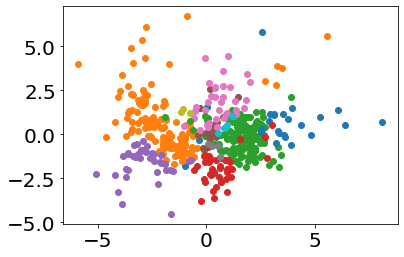

In [62]:
# visualization
unique = np.unique(clusteringDBSCAN.labels_)
for i in unique:
    plt.scatter(data_pca_label_[clusteringDBSCAN.labels_==i, 0], data_pca_label_[clusteringDBSCAN.labels_==i,1])